**Will it rain or won't it rain? I gotta know so I know how to dress!!**

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params={"figure.facecolor":(0.0,0.0,0.0,0),
        "axes.facecolor":(1.0,1.0,1.0,1),
        "savefig.facecolor":(0.0,0.0,0.0,0)}
plt.rcParams.update(params)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Before we continue, we must drop the column *RISK_MM* as including it will lead to data leakage:

In [3]:
df.drop(["RISK_MM"],axis=1,inplace=True)

Ok, now we continue with checking our data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

There are 142193 readings and 23 columns, of which *RainTomorrow* is our target variable. We also have a mixture of numerical and categorical variables, and some missing values (which we shall tackle when we split the data into the training and testing sets).

First let's see view our target variable ***RainTomorrow***:

In [5]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0, 0.5, 'Count')

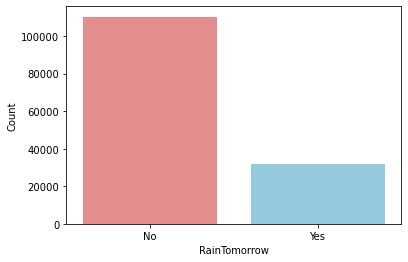

In [6]:
sns.countplot(df["RainTomorrow"],palette=["lightcoral","skyblue"])
plt.ylabel("Count")

In [7]:
df["RainTomorrow"]=df["RainTomorrow"].apply(lambda x:0 if x=="No" else 1)

Now let's go through and check the values for each feature. We will start with the numerical features:

In [8]:
df.describe().drop(["RainTomorrow"],axis=1).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [9]:
for column in df.select_dtypes(exclude="object").drop(["RainTomorrow"],axis=1).columns:
    print(column,":",df[column].isnull().sum(),"missing values.")

MinTemp : 637 missing values.
MaxTemp : 322 missing values.
Rainfall : 1406 missing values.
Evaporation : 60843 missing values.
Sunshine : 67816 missing values.
WindGustSpeed : 9270 missing values.
WindSpeed9am : 1348 missing values.
WindSpeed3pm : 2630 missing values.
Humidity9am : 1774 missing values.
Humidity3pm : 3610 missing values.
Pressure9am : 14014 missing values.
Pressure3pm : 13981 missing values.
Cloud9am : 53657 missing values.
Cloud3pm : 57094 missing values.
Temp9am : 904 missing values.
Temp3pm : 2726 missing values.


Quite a number of missing values, which we will impute after we split the data.

For numerical features, it is important to remove any outliers to improve model's performance.

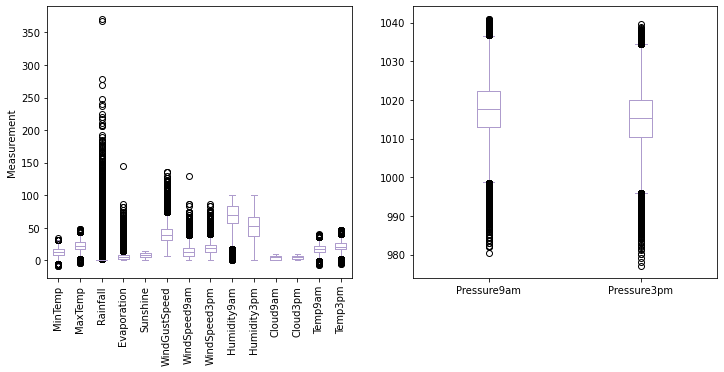

In [10]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

df[df.select_dtypes(exclude="object").columns.drop(["Pressure9am","Pressure3pm","RainTomorrow"])].plot(kind="box",color="#AE9CCD",ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_ylabel("Measurement")

df[["Pressure9am","Pressure3pm"]].plot(kind="box",color="#AE9CCD",ax=axes[1])

From the above boxplots, we have quite a number of outliers outside 1.5 times the interquartile range. But because there are no real bounds for weather data, we will not be removing all of these outliers. If we do we will be creating a perfect dataset that won't properly reflect real world weather. Instead let's just further examine *Rainfall*, *Evaporation* and *WindSpeed9am*:

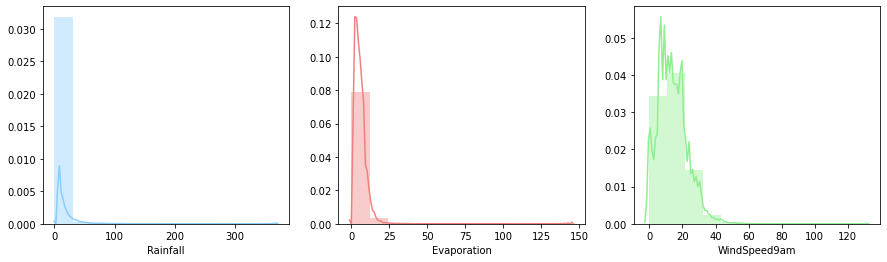

In [11]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.distplot(df["Rainfall"],bins=12,color="lightskyblue",ax=axes[0])
sns.distplot(df["Evaporation"],bins=12,color="lightcoral",ax=axes[1])
sns.distplot(df["WindSpeed9am"],bins=12,color="lightgreen",ax=axes[2])

Although it is possible to achieve these amounts of rainfall, evaporation and wind speed - for example in a storm or heatwave event - we will be removing them from the dataset so the model doesn't think these extreme weather events are common.

In [12]:
droppers=df.loc[(df["Rainfall"]>300)|(df["Evaporation"]>100)|(df["WindSpeed9am"]>100)]
df.drop(droppers.index,inplace=True)

In [13]:
print("We have dropped {num1} rows, so now instead of the initial 142193 readings, we have {num2}.".format(num1=142193-df.shape[0],num2=df.shape[0]))

We have dropped 4 rows, so now instead of the initial 142193 readings, we have 142189.


Let's continue with the categorical features:

In [14]:
df.select_dtypes(include="object").describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,142189,142189,132862,132177,138412,140783
unique,3436,49,16,16,16,2
top,2014-07-15,Canberra,W,N,SE,No
freq,49,3418,9780,11393,10663,109331


For categorical features, it is important to check the actual categories and change the format into numbers. Remember we will only impute the missing data after we split the data.

***Date***

- There are 3436 unique values in the format of YYYY-MM-DD. Instead of using the *categoricals* function, we will just split up the date format into year, month and day but we only use the month data as rain is seasonal and not yearly/daily.

In [15]:
print("{num} missing values.".format(num=df["Date"].isnull().sum()))

0 missing values.


In [16]:
df["Date"]=pd.to_datetime(df["Date"])

In [17]:
df["Month"]=df["Date"].dt.month

- Now we can drop the *Date* column:

In [18]:
df.drop(["Date"],axis=1,inplace=True)
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12


***Location***

- We will not be dropping *Location* because rain is regional.

In [19]:
print("{num} missing values.".format(num=df["Location"].isnull().sum()))

0 missing values.


In [20]:
df["Location"].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3191
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2954
Witchcliffe         2952
CoffsHarbour        2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


- We will convert these categories into numbers when we impute the missing values after we split the data.

***WindGustDir***

In [21]:
print("{num} missing values.".format(num=df["WindGustDir"].isnull().sum()))

9327 missing values.


In [22]:
df["WindGustDir"].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8900
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

- We will convert these categories into numbers when we impute the missing values after we split the data.

***WindDir9am***

In [23]:
print("{num} missing values.".format(num=df["WindDir9am"].isnull().sum()))

10012 missing values.


In [24]:
df["WindDir9am"].value_counts()

N      11393
SE      9162
E       9024
SSE     8965
NW      8551
S       8493
W       8260
SW      8236
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

- We will convert these categories into numbers when we impute the missing values after we split the data.

***WindDir3pm***

In [25]:
print("{num} missing values.".format(num=df["WindDir3pm"].isnull().sum()))

3777 missing values.


In [26]:
df["WindDir3pm"].value_counts()

SE     10663
W       9911
S       9597
WSW     9328
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8341
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

- We will convert these categories into numbers when we impute the missing values after we split the data.

***RainToday***

In [27]:
print("{num} missing values.".format(num=df["RainToday"].isnull().sum()))

1406 missing values.


In [28]:
df["RainToday"].value_counts()

No     109331
Yes     31452
Name: RainToday, dtype: int64

- We will also convert these text data into numbers but just using a simple if statement:

In [29]:
df["RainToday"]=df["RainToday"].apply(lambda x:0 if x=="No" else 1)
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12


So this is what our data looks like now:

In [30]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12


Before we tackle the missing values or scale the data, we must first split the data into the training and testing sets to ensure we do not cause any data leakage.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [33]:
print("Training set shape:",x_train.shape)
print("Testing set shape:",x_test.shape)

Training set shape: (95266, 22)
Testing set shape: (46923, 22)


To replace the missing values, we will compute a fill value for the numerical and categorical features based on the training set and then apply them to the testing set.

In [34]:
x_train.isnull().sum()

Location             0
MinTemp            424
MaxTemp            205
Rainfall           975
Evaporation      40810
Sunshine         45397
WindGustDir       6200
WindGustSpeed     6161
WindDir9am        6698
WindDir3pm        2563
WindSpeed9am       917
WindSpeed3pm      1786
Humidity9am       1192
Humidity3pm       2428
Pressure9am       9444
Pressure3pm       9413
Cloud9am         35884
Cloud3pm         38151
Temp9am            606
Temp3pm           1833
RainToday            0
Month                0
dtype: int64

In [35]:
x_test.isnull().sum()

Location             0
MinTemp            213
MaxTemp            117
Rainfall           431
Evaporation      20030
Sunshine         22417
WindGustDir       3127
WindGustSpeed     3106
WindDir9am        3314
WindDir3pm        1214
WindSpeed9am       430
WindSpeed3pm       843
Humidity9am        582
Humidity3pm       1181
Pressure9am       4569
Pressure3pm       4567
Cloud9am         17773
Cloud3pm         18942
Temp9am            298
Temp3pm            892
RainToday            0
Month                0
dtype: int64

Missing values in numerical features will be filled with the median. We could in fact use the mean or a set constant instead, but because of the range and the number of outliers in the data we will use the median.

In [36]:
for df in [x_train,x_test]:
    for col in df.select_dtypes(exclude="object").columns:
        col_median=x_train[col].median()
        df[col].fillna(col_median,inplace=True)

In [37]:
x_train.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6200
WindGustSpeed       0
WindDir9am       6698
WindDir3pm       2563
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
Month               0
dtype: int64

In [38]:
x_test.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      3127
WindGustSpeed       0
WindDir9am       3314
WindDir3pm       1214
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
Month               0
dtype: int64

Missing values in categorical features will be filled with the mode.

In [39]:
for df in [x_train,x_test]:
    for col in df.select_dtypes("object").columns:
        col_mode=x_train[col].mode()[0]
        df[col].fillna(col_mode,inplace=True)

In [40]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Month            0
dtype: int64

In [41]:
x_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Month            0
dtype: int64

Up until now the categorical features are still in text format. We will have to convert them into a format the model will be able to use it as input (i.e. numbers). We shall do so by converting the text into numbers using pd.get_dummies, concatenating the dummies to the dataframe, and then dropping the original column:

In [42]:
for col in x_train.select_dtypes("object").columns:
    x_train=pd.concat([x_train,pd.get_dummies(x_train[col],drop_first=True)],axis=1)
    x_train.drop([col],axis=1,inplace=True)

In [43]:
x_train.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,...,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
89516,17.8,27.0,1.2,4.8,8.5,33.0,17.0,19.0,66.0,61.0,1016.7,1012.8,5.0,5.0,21.9,25.3,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
94464,12.8,23.9,0.0,14.8,10.9,30.0,9.0,15.0,62.0,44.0,1025.0,1022.6,5.0,5.0,16.1,22.9,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
for col in x_test.select_dtypes("object").columns:
    x_test=pd.concat([x_test,pd.get_dummies(x_test[col],drop_first=True)],axis=1)
    x_test.drop([col],axis=1,inplace=True)

In [45]:
x_test.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,...,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
91327,22.4,26.0,0.4,5.8,0.1,31.0,13.0,20.0,86.0,67.0,1014.9,1013.2,8.0,8.0,22.8,25.6,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
79727,8.7,26.4,0.0,8.0,13.6,31.0,13.0,11.0,74.0,36.0,1017.3,1013.9,5.0,5.0,14.5,25.4,0,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Since each feature has it's own range of values, we will scale the data (again, only based on the training set and then applied to the testing set):

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [48]:
x_train.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,...,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.881124,0.534272,-0.135755,-0.119948,0.165556,-0.527486,0.341781,0.040256,-0.151261,0.461316,-0.139924,-0.367417,0.15219,0.138393,0.761805,0.531305,1.821996,1.052027,-0.146699,-0.148075,-0.14826,-0.144784,-0.147741,-0.148777,-0.150755,-0.146923,-0.157535,-0.145988,-0.145086,-0.144633,-0.152746,6.892468,-0.1513,-0.103774,-0.147667,-0.133332,-0.146998,-0.147667,-0.140493,-0.147964,-0.144935,-0.145086,-0.104905,-0.14655,-0.145199,-0.146363,-0.141152,-0.145988,-0.151155,-0.147147,...,-0.147741,-0.133536,-0.145387,-0.147593,-0.147964,-0.242983,-0.232309,-0.259627,-0.228647,-0.219764,-0.217603,-0.244288,-0.258497,-0.265565,-0.258751,-0.255176,-0.257339,2.539156,-0.24614,-0.257872,-0.240282,-0.238493,-0.420362,-0.236421,-0.242837,4.162200,-0.25161,-0.253515,-0.262471,-0.26034,-0.23291,-0.248387,-0.249718,-0.232108,-0.225683,-0.239107,-0.250074,-0.252882,-0.247839,4.581065,-0.239156,-0.251209,-0.269552,-0.336249,-0.262608,-0.244674,-0.263338,-0.274714,-0.254195,-0.265270
1,0.098308,0.098202,-0.281787,3.015136,1.031460,-0.755675,-0.564759,-0.418341,-0.362233,-0.366792,1.089010,1.098977,0.15219,0.138393,-0.133968,0.181787,-0.548849,-0.993269,-0.146699,-0.148075,-0.14826,-0.144784,-0.147741,-0.148777,-0.150755,-0.146923,-0.157535,-0.145988,-0.145086,-0.144633,-0.152746,-0.145086,-0.1513,-0.103774,-0.147667,-0.133332,-0.146998,-0.147667,-0.140493,-0.147964,-0.144935,-0.145086,-0.104905,-0.14655,-0.145199,-0.146363,-0.141152,-0.145988,-0.151155,-0.147147,...,-0.147741,-0.133536,-0.145387,-0.147593,-0.147964,-0.242983,-0.232309,-0.259627,-0.228647,-0.219764,-0.217603,-0.244288,-0.258497,-0.265565,-0.258751,-0.255176,-0.257339,-0.393832,-0.24614,3.877892,-0.240282,4.192999,-0.420362,-0.236421,-0.242837,-0.240258,-0.25161,-0.253515,-0.262471,-0.26034,-0.23291,-0.248387,-0.249718,-0.232108,-0.225683,-0.239107,-0.250074,-0.252882,-0.247839,-0.218290,-0.239156,-0.251209,-0.269552,-0.336249,-0.262608,-0.244674,-0.263338,-0.274714,-0.254195,3.769738


In [49]:
x_test.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,...,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,1.601314,0.393605,-0.233110,0.193561,-2.865107,-0.679612,-0.111489,0.154905,0.903597,0.75359,-0.406440,-0.307565,1.459972,1.553607,0.900804,0.574995,-0.548849,-0.701083,-0.146699,-0.148075,-0.14826,-0.144784,-0.147741,-0.148777,-0.150755,-0.146923,-0.157535,-0.145988,-0.145086,-0.144633,-0.152746,-0.145086,-0.1513,-0.103774,-0.147667,-0.133332,-0.146998,-0.147667,-0.140493,-0.147964,-0.144935,-0.145086,-0.104905,-0.14655,-0.145199,-0.146363,-0.141152,-0.145988,-0.151155,-0.147147,...,-0.147741,-0.133536,-0.145387,-0.147593,-0.147964,-0.242983,-0.232309,-0.259627,-0.228647,-0.219764,-0.217603,-0.244288,-0.258497,3.765556,-0.258751,-0.255176,-0.257339,-0.393832,-0.24614,-0.257872,-0.240282,-0.238493,-0.420362,-0.236421,-0.242837,-0.240258,-0.25161,-0.253515,-0.262471,3.841127,-0.23291,-0.248387,-0.249718,-0.232108,-0.225683,-0.239107,-0.250074,-0.252882,-0.247839,-0.21829,-0.239156,-0.251209,-0.269552,-0.336249,3.807951,-0.244674,-0.263338,-0.274714,-0.254195,-0.26527
1,-0.543601,0.449872,-0.281787,0.883279,2.005602,-0.679612,-0.111489,-0.876938,0.270682,-0.75649,-0.051085,-0.202822,0.152190,0.138393,-0.381078,0.545868,-0.548849,1.636397,-0.146699,-0.148075,-0.14826,-0.144784,-0.147741,-0.148777,-0.150755,-0.146923,-0.157535,-0.145988,-0.145086,6.914066,-0.152746,-0.145086,-0.1513,-0.103774,-0.147667,-0.133332,-0.146998,-0.147667,-0.140493,-0.147964,-0.144935,-0.145086,-0.104905,-0.14655,-0.145199,-0.146363,-0.141152,-0.145988,-0.151155,-0.147147,...,-0.147741,-0.133536,-0.145387,-0.147593,-0.147964,-0.242983,-0.232309,-0.259627,-0.228647,-0.219764,-0.217603,-0.244288,-0.258497,-0.265565,-0.258751,-0.255176,3.885922,-0.393832,-0.24614,-0.257872,4.161777,-0.238493,-0.420362,-0.236421,-0.242837,-0.240258,-0.25161,-0.253515,-0.262471,-0.260340,-0.23291,-0.248387,-0.249718,-0.232108,-0.225683,-0.239107,-0.250074,-0.252882,-0.247839,-0.21829,-0.239156,-0.251209,-0.269552,-0.336249,-0.262608,-0.244674,3.797394,-0.274714,-0.254195,-0.26527


Let's finally make our model:

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression(random_state=7)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

Next we can evaluate our model using a classifcation report and a confusion matrix.

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     36491
           1       0.72      0.51      0.60     10432

    accuracy                           0.85     46923
   macro avg       0.79      0.73      0.75     46923
weighted avg       0.84      0.85      0.84     46923



In [55]:
def cm(predictions):
    cm_matrix=pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=["No Rain","Rain"],index=["No Rain","Rain"])
    sns.heatmap(cm_matrix,annot=True,square=True,fmt="d",cmap="Purples",linecolor="w",linewidth=2)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.yticks(va="center")

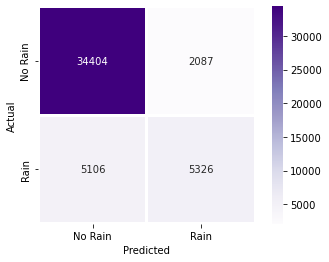

In [56]:
cm(y_predict)

Our model didn't do so bad with an accuracy score of 0.85! This means our model was able to correctly predict 85% of the instances. It was however better at predicting class 0 (i.e. no rain) than class 1 (i.e. rain) with the higher precision and recall, and the model also predicted a lot more false negatives (i.e. predicted that it would not rain when it actually will) than false positives (i.e. predicted that it would rain when it actually will not).


But was our model over/underfittings??

In [57]:
print("Training set score: {num:.4f}.".format(num=model.score(x_train,y_train)))
print("Testing set score: {num:.4f}.".format(num=model.score(x_test,y_test)))

Training set score: 0.8490.
Testing set score: 0.8467.


The accuracy scores of both the training and testing set are very similar, so there is clearly no indication of any over/underfitting.

The model we created was based on the default parameters, so let's see if we can improve it by adjusting the parameters using grid search:

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters=[{"penalty":["l1","l2","elasticnet"]},{"C":[0.1,1,10,100]},{"class_weight":["balanced",None]},
            {"solver":["newton-cg","lbfgs","liblinear","sag","saga"]},{"multi_class":["auto","ovr","multinomial"]}]

grid=GridSearchCV(estimator=model,param_grid=parameters,refit=True,cv=5,verbose=1)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'C': [0.1, 1, 10, 100]},
                         {'class_weight': ['balanced', None]},
                         {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'multi_class': ['auto', 'ovr', 'multinomial']}],
             verbose=1)

In [60]:
grid_results=pd.DataFrame(grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,param_class_weight,param_solver,param_multi_class,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028848,0.000578,0.000000,0.000000,l1,NaN,NaN,NaN,NaN,{'penalty': 'l1'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,0.793635,0.030337,0.006234,0.000149,l2,NaN,NaN,NaN,NaN,{'penalty': 'l2'},0.848273,0.851834,0.848528,0.844381,0.849997,0.848603,0.002463,5
2,0.030701,0.000309,0.000000,0.000000,elasticnet,NaN,NaN,NaN,NaN,{'penalty': 'elasticnet'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.789217,0.019866,0.006276,0.000090,NaN,0.1,NaN,NaN,NaN,{'C': 0.1},0.848431,0.851834,0.848580,0.844434,0.849735,0.848603,0.002414,12
4,0.819102,0.026929,0.006770,0.000799,NaN,1,NaN,NaN,NaN,{'C': 1},0.848273,0.851834,0.848528,0.844381,0.849997,0.848603,0.002463,5
5,0.821891,0.018685,0.006332,0.000056,NaN,10,NaN,NaN,NaN,{'C': 10},0.848221,0.851782,0.848475,0.844329,0.850102,0.848582,0.002481,13
6,0.822103,0.033003,0.007454,0.001950,NaN,100,NaN,NaN,NaN,{'C': 100},0.848221,0.851782,0.848475,0.844329,0.850102,0.848582,0.002481,13
7,0.896541,0.081704,0.006441,0.000181,NaN,NaN,balanced,NaN,NaN,{'class_weight': 'balanced'},0.790700,0.796672,0.796043,0.794521,0.797617,0.795111,0.002425,15
8,0.825564,0.030016,0.006307,0.000088,NaN,NaN,None,NaN,NaN,{'class_weight': None},0.848273,0.851834,0.848528,0.844381,0.849997,0.848603,0.002463,5
9,2.174512,0.111385,0.006434,0.000129,NaN,NaN,NaN,newton-cg,NaN,{'solver': 'newton-cg'},0.848273,0.851887,0.848528,0.844329,0.850050,0.848613,0.002500,2


In [61]:
print("Using grid search, the best parameters of the model should be",grid.best_params_)

Using grid search, the best parameters of the model should be {'solver': 'liblinear'}


Let's see how much grid search improved our model:

In [62]:
y_predict2=grid.predict(x_test)

In [63]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     36491
           1       0.72      0.51      0.60     10432

    accuracy                           0.85     46923
   macro avg       0.79      0.73      0.75     46923
weighted avg       0.84      0.85      0.84     46923



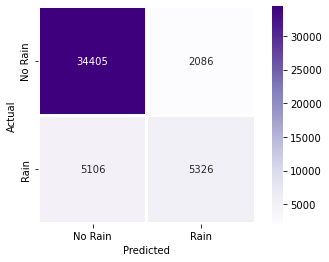

In [64]:
cm(y_predict2)

In [65]:
print("The grid seach only improved the model's accuracy from {num1:.6f} to {num2:.6f}.".format(num1=model.score(x_test,y_test),num2=grid.score(x_test,y_test)))

The grid seach only improved the model's accuracy from 0.846706 to 0.846728.


So there's good news **or** bad news - depends on if you're a glass half full or a glass half empty type of person.

Seems like the original model was already pretty good as conducting a grid search only improved the model ever so slightly by 0.000022 by only correctly predicting one more case of no rain.

**Now should I bring my umbrella or sunglasses..**